<a href="https://colab.research.google.com/github/nisha1365/TECHNICAL_TRAINING_CTS/blob/main/Assignment_13_10_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prepare a Python notebook to build, train and evaluate a regression model on the given dataset. Please read the instructions carefully.

Business Case: Build regression models to predict car price based on various features given:


1.	Import Libraries/Dataset (1 mark)

•	Import the required libraries and the dataset 


In [183]:
# import numpy package for arrays and stuff
import numpy as np 
  
# import matplotlib.pyplot for plotting our result
import matplotlib.pyplot as plt
  
# import pandas for importing csv files 
import pandas as pd 
%matplotlib inline

2.	Data Visualisation and augmentation (0.5*6 =3 marks)

•	Plot at least two EDA graphs (use matplotlib/seaborn/any other library)

•	Prepare data to be able to build the model

•	Bring the train and test data in the required format

•	Perform missing values check 

•	Perform scaling of data

•	Print the shapes of train and test data


In [184]:
df = pd.read_csv("/content/CarPrice.csv")

In [185]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [186]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Result - No Missing Value

In [187]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

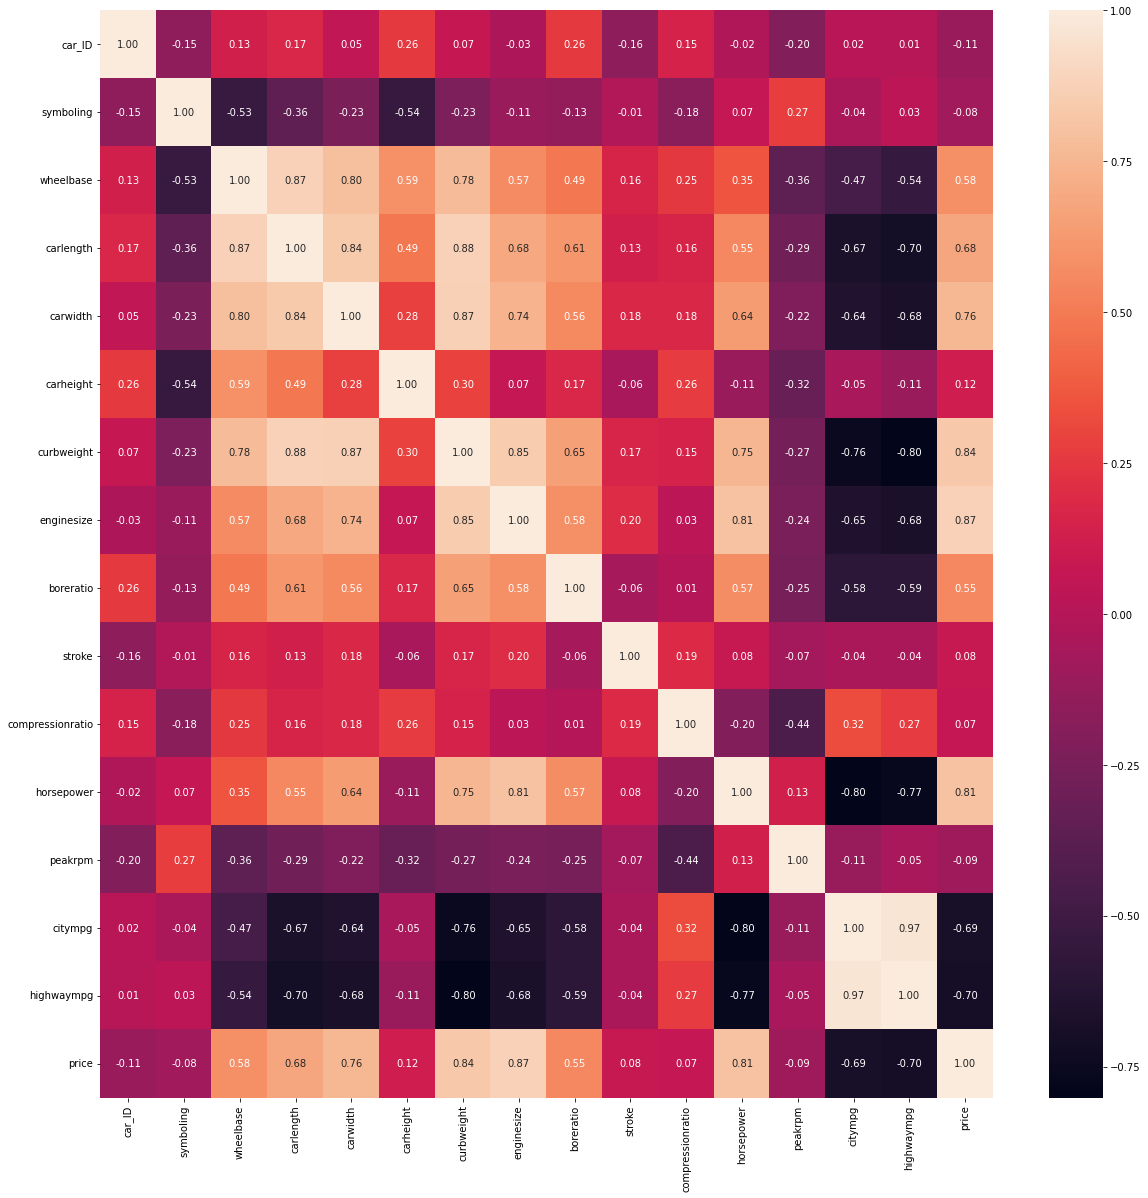

In [189]:

import seaborn as sns
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(), annot = True, fmt= '.2f')

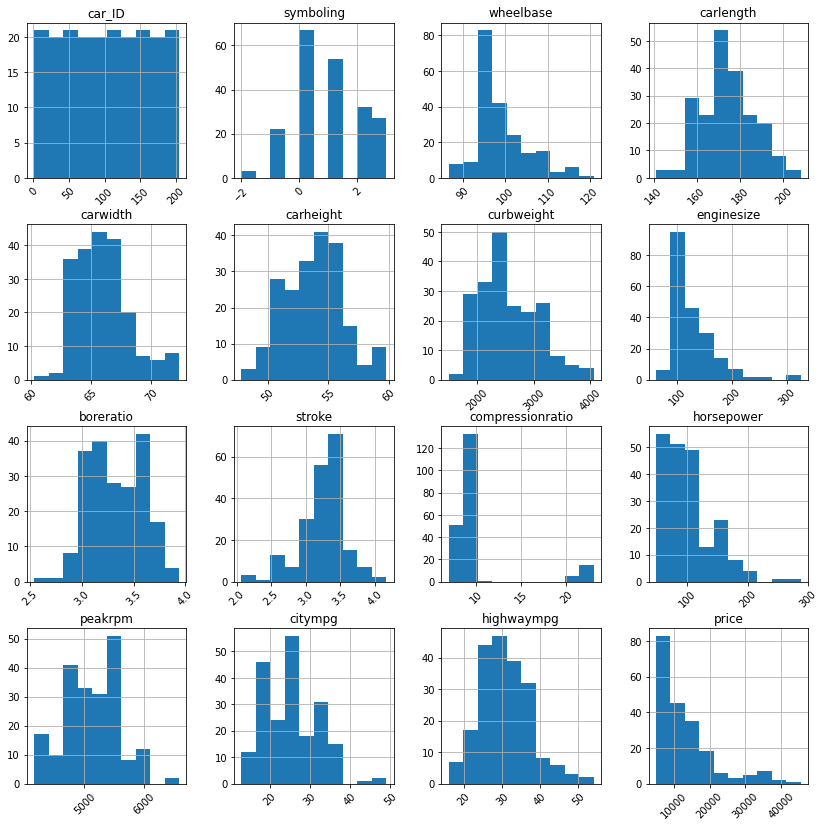

In [190]:
df.hist(figsize=(14,14), xrot=45)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


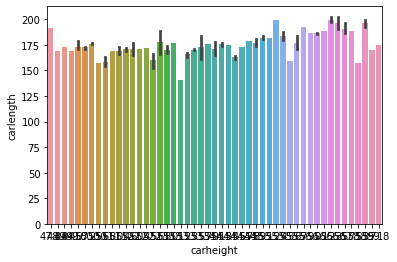

In [191]:
sns.barplot(df.carheight,df.carlength)

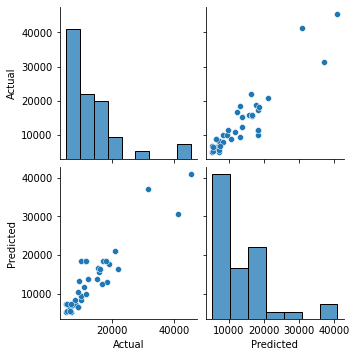

In [212]:
sns.pairplot(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


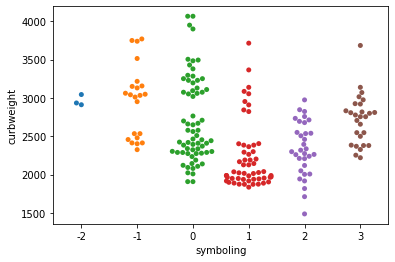

In [193]:
sns.swarmplot(df.symboling,df.curbweight)

In [194]:
# shape of the dataset
print(df.shape)
# Type of the dataset
print(df.dtypes)

(205, 26)
car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object


In [195]:
# encoding the categorical data
df = pd.get_dummies(df, columns = ['fuelsystem','cylindernumber','enginetype','CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation'])
df

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,1,0,0,0,0,0,0,1,1,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,1,0,0,0,0,0,0,1,1,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,1,0,0,0,0,1,1,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,1,0,0,1,0,1,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,0,0,0,1,0,0,0,1,1,0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,0,0,0,1,0,0,0,1,1,0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,0,0,0,1,0,0,0,1,1,0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,0,0,0,1,0,0,0,1,1,0


In [196]:
X = df.drop('price', axis=1)
y = df['price']

3.	Decision Tree Regression Model Building (0.5*3 = 1.5 marks)

•	Build a decision tree regression model

•	Train the model on the train dataset 

•	Print the model summary


In [197]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [198]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
clf = regressor.fit(X_train, y_train)

In [199]:
y_pred = regressor.predict(X_test)

Now let's compare some of our predicted values with the actual values and see how accurate we were:

In [200]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
52,6795.0,5348.0
181,15750.0,15690.0
5,15250.0,13950.0
18,5151.0,5348.0
188,9995.0,9549.0
170,11199.0,18399.0
76,5389.0,5572.0
154,7898.0,7295.0
104,17199.0,18399.0
33,6529.0,7129.0


Model Evaluation

In [201]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2224.4756097560976
Mean Squared Error: 11345123.701219512
Root Mean Squared Error: 3368.252321489516


In [202]:
from sklearn import tree

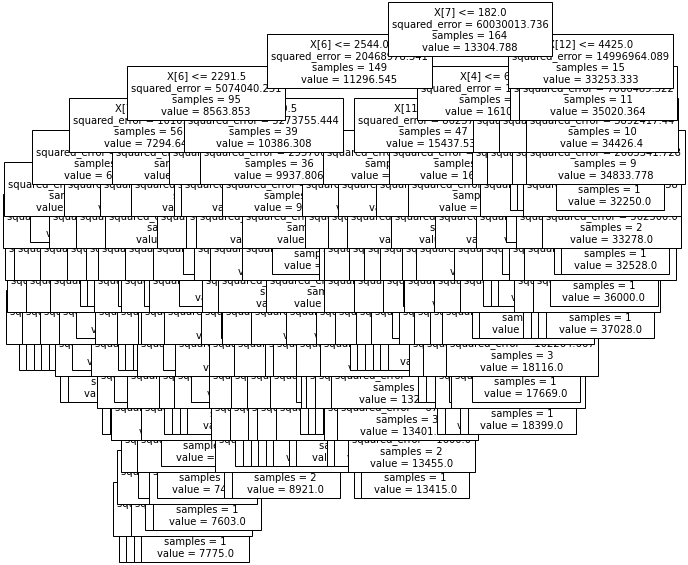

In [203]:
# Plot the decision tree
#
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(clf, fontsize=10)
plt.show()

Accuracy is a classification metric. You can't use it with a regression.

4.	Random Forest Regression Model Building (0.5*3 = 1.5 marks)

•	Build a random forest regression Model

•	Train the model on the train dataset 

•	Print the model summary


In [204]:
dataset = pd.read_csv("/content/CarPrice.csv")

In [205]:
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [206]:
# encoding the categorical data
dataset = pd.get_dummies(dataset, columns = ['fuelsystem','cylindernumber','enginetype','CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation'])
dataset

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,1,0,0,0,0,0,0,1,1,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,1,0,0,0,0,0,0,1,1,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,1,0,0,0,0,1,1,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,1,0,0,1,0,1,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,0,0,0,1,0,0,0,1,1,0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,0,0,0,1,0,0,0,1,1,0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,0,0,0,1,0,0,0,1,1,0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,0,0,0,1,0,0,0,1,1,0


In [207]:
X = dataset.drop('price', axis=1)
y = dataset['price']

In [208]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [209]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [210]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [211]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1911.3436987804876
Mean Squared Error: 7490127.357848395
Root Mean Squared Error: 2736.8097043543958


5.	Model Evaluation (1 + 1 = 2 marks)

•	Print the final train and validation RMSE and MSE for both models 

•	Check for other evaluation metrics like MAE, R2, etc. and explain which one should be used to evaluate this model (consider the business case)


FOR DECISION TREES - 

Mean Absolute Error: 2211.890243902439

Mean Squared Error: 11475329.213414634

Root Mean Squared Error: 3387.525529559096


FOR RANDOM FOREST - 

Mean Absolute Error: 1911.3436987804876

Mean Squared Error: 7490127.357848395

Root Mean Squared Error: 2736.8097043543958

6.	Compare the performance of decision tree regression and random forest regression models for given dataset (1 mark)

Here we can see that "RANDOM FOREST" performs much better than "DECISION TREES" Bby seeing the mean errors random forest have much less mean error's as compared to the decision trees.